In [1]:
from __future__ import absolute_import
from __future__ import division

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)


"""
Define layer size etc
"""

LEARNING_RATE = 0.01
#use batches to shiffer through reasonable data patches
BATCH_SIZE = 100
#784=28*28 pixels in all mnist pics
MNIST_WIDTH = 28
MNIST_HEIGHT = 28
#pictures are divided into ten different classes
MNIST_CLASSES = 10
#number of pixels in one picture
MNIST_PIXELS = MNIST_WIDTH * MNIST_HEIGHT
#placing shape here is useful if you have that info, because tf will throw error if other pic sizes are flowing in! :)
x = tf.placeholder('float',[None, MNIST_PIXELS])
y = tf.placeholder('float')
y_ = tf.placeholder(tf.float32, [None, MNIST_CLASSES])
sess = tf.InteractiveSession()


def weight_variable(shape):
    """Creates a tf Variable of shape 'shape' with random elements"""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """Create a small bias of shape 'shape' with contants values of 0.1"""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    """Use a conv layer with weights W on zero padded input x and stride 1"""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """Create a 2x2 pooling layer with strides 2, reducing the resolution"""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# x is 1x28*28 ( x = [34,43,5,6,0,0,7,5,...] )
# W_conv1 is 5x5
# b_conv1 is 1x32
W_conv1 = weight_variable([7,7,1,32])
b_conv1 = bias_variable([32])
# input data is embedded in 4d tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])
# h_conv1 is result of applied conv filter W to x
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Apply second convolutional network
W_conv2 = weight_variable([5, 5, 32, 16])
b_conv2 = bias_variable([16])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    
h_pool2 = max_pool_2x2(h_conv2)

#Fully connected layer
W_fc1 = weight_variable([7 * 7 * 16, 50])
b_fc1 = bias_variable([50])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([50, MNIST_CLASSES])
b_fc2 = bias_variable([MNIST_CLASSES])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
def train_neural_network(x):
    for i in range(201):
        batch = mnist.train.next_batch(BATCH_SIZE)
        if i%BATCH_SIZE == 0:
            train_accuracy = accuracy.eval(feed_dict={
                    x:batch[0], y_: batch[1], keep_prob: 1.0})
            print("step %d, training accuracy %f"%(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print("test accuracy %g"%accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

In [4]:
train_neural_network(x)

step 0, training accuracy 0.110000
step 100, training accuracy 0.970000
step 200, training accuracy 0.960000
test accuracy 0.9658


In [5]:
print("test accuracy %g"%accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9658


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

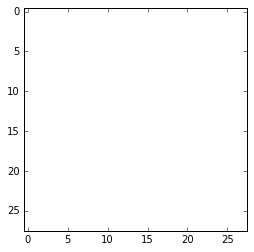

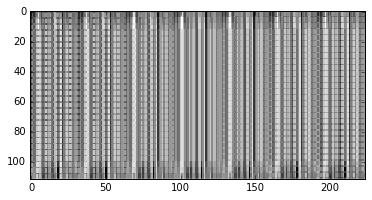

Tensor("Conv2D_87:0", shape=(1, 28, 28, 16), dtype=float32)


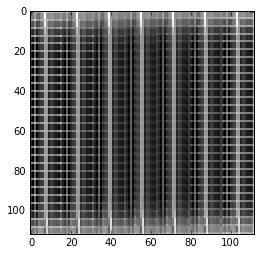

In [103]:
timg1 = tf.fill([28, 28], 1.0)
#timg1 = tf.reshape(mnist.test.images[2], shape=[28, 28])

pl.imshow(timg1.eval(), interpolation='none', cmap=pl.get_cmap('gray_r'))
pl.show()

tconv1 = conv2d(tf.reshape(timg1, shape=[-1, 28, 28, 1]), W_conv1)

pl.imshow(tf.reshape(tconv1, shape=[112, 224]).eval(), interpolation='none', cmap=pl.get_cmap('gray_r'))
pl.show()

t2conv1 = conv2d(tconv1, W_conv2)
print(t2conv1)

pl.imshow(tf.reshape(t2conv1, shape=[112, 112]).eval(), interpolation='none', cmap=pl.get_cmap('gray_r'))
pl.show()

In [61]:
print(W_conv1)

Tensor("Variable/read:0", shape=(7, 7, 1, 32), dtype=float32)


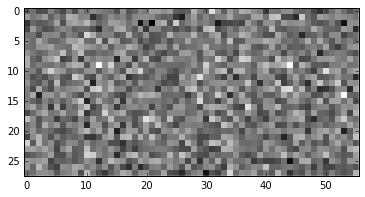

In [74]:
# Visualize the learned weight of conv layer 1
pl.imshow(tf.reshape(W_conv1, shape=[28, 56]).eval(), interpolation='none', cmap=pl.get_cmap('gray_r'))
pl.show()

Tensor("Variable_2/read:0", shape=(5, 5, 32, 16), dtype=float32)


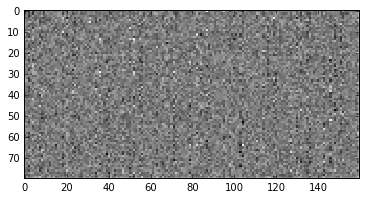

In [76]:
print(W_conv2)
# Visualize the learned weight of conv layer 2
pl.imshow(tf.reshape(W_conv2, shape=[80, 160]).eval(), interpolation='none', cmap=pl.get_cmap('gray_r'))
pl.show()